In [57]:
import pandas as pd

In [58]:
import seaborn as sns
import numpy as np

In [59]:
train=pd.read_csv("/content/train_LZdllcl.csv")

In [60]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [61]:
test=pd.read_csv("/content/test_2umaH9m.csv")

In [62]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [63]:
y=train.pop("is_promoted")

In [64]:
data=pd.concat([train,test],ignore_index=True)

In [65]:
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
78294,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
78295,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
78296,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [66]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               3443
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    5936
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [67]:
data["education"]=data["education"].fillna("Not_given")

In [68]:
data["previous_year_rating"].value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [69]:
data["previous_year_rating"]=data["previous_year_rating"].fillna(0)

In [70]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [71]:
data.drop("employee_id",axis=1,inplace=True)

In [72]:
data["previous_year_rating"].value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
0.0     5936
Name: previous_year_rating, dtype: int64

In [73]:
data["training_score_per_age"]=data["avg_training_score"]/data["age"]

In [74]:
data["avg_train_score_per_training"]=data["avg_training_score"]/data["no_of_trainings"]

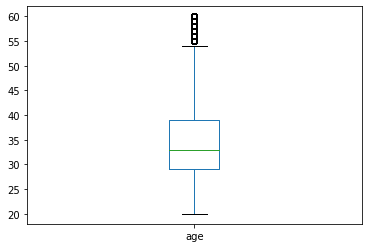

In [75]:
data["age"].plot.box()

In [76]:
data["age_per_experience"]=data["age"]/data["length_of_service"]

In [77]:
data["experience_per_age"]=data["length_of_service"]/data["age"]

In [78]:
data["age_joining"]=data["age"]-data["length_of_service"]

In [79]:
data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'training_score_per_age', 'avg_train_score_per_training',
       'age_per_experience', 'experience_per_age', 'age_joining'],
      dtype='object')

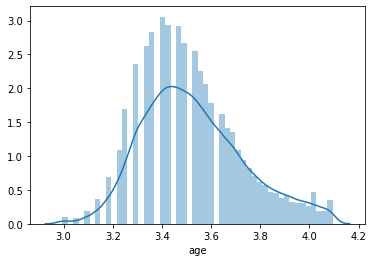

In [80]:
sns.distplot(np.log(data.age))

In [81]:
data["age_log"]=np.log(data.age)

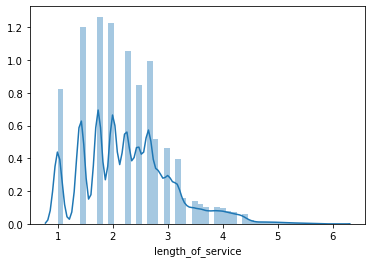

In [82]:
sns.distplot(np.sqrt(data.length_of_service))

In [83]:
np.sqrt(data.length_of_service).skew()

0.6566109320583869

In [84]:
data["length_service_sqrt"]=np.sqrt(data.length_of_service)

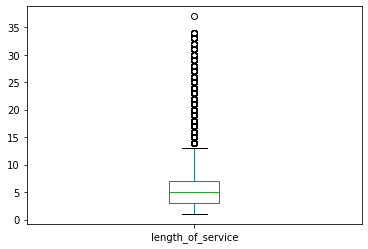

In [85]:
data.length_of_service.plot.box()

In [86]:
data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,training_score_per_age,avg_train_score_per_training,age_per_experience,experience_per_age,age_joining,age_log,length_service_sqrt
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,1.400000,49.000000,4.375000,0.228571,27,3.555348,2.828427
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,2.000000,60.000000,7.500000,0.133333,26,3.401197,2.000000
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,1.470588,50.000000,4.857143,0.205882,27,3.526361,2.645751
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,1.282051,25.000000,3.900000,0.256410,29,3.663562,3.162278
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,1.622222,73.000000,22.500000,0.044444,43,3.806662,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,2.541667,61.000000,24.000000,0.041667,23,3.178054,1.000000
78294,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,2.387097,74.000000,4.428571,0.225806,24,3.433987,2.645751
78295,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,1.923077,50.000000,6.500000,0.153846,22,3.258097,2.000000
78296,Procurement,region_31,Bachelor's,m,sourcing,3,27,0.0,1,0,0,70,2.592593,23.333333,27.000000,0.037037,26,3.295837,1.000000


In [87]:
data["training_score"]=data["avg_training_score"]*data["no_of_trainings"]

In [88]:
data.education.value_counts()

Bachelor's          52247
Master's & above    21429
Not_given            3443
Below Secondary      1179
Name: education, dtype: int64

In [89]:
data["edu_rank"]=data.education.map({"Bachelor's":2,
                                     "Below Secondary":1,
                                     "Master's & above":3,
                                     "Not_given":0})

In [90]:
data.drop("recruitment_channel",axis=1,inplace=True)

In [91]:
encoded_data=pd.get_dummies(data)

In [92]:
encoded_data

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,training_score_per_age,avg_train_score_per_training,age_per_experience,experience_per_age,age_joining,age_log,length_service_sqrt,training_score,edu_rank,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Not_given,gender_f,gender_m
0,1,35,5.0,8,1,0,49,1.400000,49.000000,4.375000,0.228571,27,3.555348,2.828427,49,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,1,30,5.0,4,0,0,60,2.000000,60.000000,7.500000,0.133333,26,3.401197,2.000000,60,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,34,3.0,7,0,0,50,1.470588,50.000000,4.857143,0.205882,27,3.526361,2.645751,50,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,2,39,1.0,10,0,0,50,1.282051,25.000000,3.900000,0.256410,29,3.663562,3.162278,100,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1,45,3.0,2,0,0,73,1.622222,73.000000,22.500000,0.044444,43,3.806662,1.414214,73,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,1,24,3.0,1,0,0,61,2.541667,61.000000,24.000000,0.041667,23,3.178054,1.000000,61,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
78294,1,31,3.0,7,0,0,74,2.387097,74.000000,4.428571,0.225806,24,3.433987,2.645751,74,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
78295,1,26,4.0,4,0,0,50,1.923077,50.000000,6.500000,0.153846,22,3.258097,2.000000,50,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
78296,3,27,0.0,1,0,0,70,2.592593,23.333333,27.000000,0.037037,26,3.295837,1.000000,210,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [93]:
X_train=encoded_data[:54808]
X_test=encoded_data[54808:]

In [94]:
len(X_train)

54808

In [95]:
len(y)

54808

In [96]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [97]:
train_new = scaler.fit_transform(X_train)
test_new = scaler.transform(X_test)

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.linear_model import LogisticRegression

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test = train_test_split(train_new,y,test_size = 0.2,random_state = 1)

## LOGISTIC REGRESSION

In [38]:
def f1_weighted(y_true, y_pred):
    score = f1_score(y_true, y_pred,)
    return score

scorer = make_scorer(f1_weighted, greater_is_better=True)

In [ ]:
lr=LogisticRegression()
scores = cross_val_score(lr, train_new,y, cv = 5, scoring = scorer)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
scores.mean()

0.40051317189901436

In [ ]:
lr.fit(train_new,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
preds = lr.predict(test_new)

In [146]:
sub=pd.read_csv("/content/sample_submission_M0L0uXE.csv")

In [ ]:
sub["is_promoted"]=preds

In [ ]:
sub.to_csv("lr.csv",index=False)

## NAIVE 

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
scores = cross_val_score(gnb, train_new,y, cv = 5, scoring = scorer)

In [ ]:
scores.mean()

0.2169197113654085

In [ ]:
gnb.fit(train_new,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
pred=gnb.predict(test_new)

In [ ]:
sub["is_promoted"]=pred

In [ ]:
sub.to_csv("gnb.csv",index=False)

## XGB

In [ ]:

from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
scores = cross_val_score(xgb, train_new,y, cv = 5, scoring = scorer)

In [ ]:
scores.mean()

0.4220139416957684

In [ ]:
xgb.fit(train_new,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pred=xgb.predict(test_new)

In [ ]:
sub["is_promoted"]=pred

In [ ]:
sub.to_csv("xgb.csv",index=False)

In [106]:
from sklearn.preprocessing import Binarizer

## LGBM

In [100]:
from lightgbm import LGBMClassifier

In [123]:
lgm = LGBMClassifier(max_depth=8,n_estimators=1000)
scores = cross_val_score(lgm, train_new,y, cv = 5, scoring = scorer)

In [121]:
params=[{'max_depth':[3,5,6,8,10,12,15],
          'n_estimators':[10,50,100,1000,10000]
        }]

In [115]:
rand=RandomizedSearchCV(LGBMClassifier(),params,n_iter=4,cv=3,scoring=scorer)

In [117]:
df=pd.DataFrame(rand.cv_results_)

In [102]:
scores.mean()

0.5013594571430235

In [103]:
lgm.fit(x_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [104]:
pred=lgm.predict_proba(x_test)

In [105]:
mcc=[]

In [91]:

bn_trans = bn.transform(pred)

In [92]:
bn_trans

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [107]:
data=pd.DataFrame(bn_trans,columns=["one","two"])

In [108]:
thresholds = np.linspace(0.01, 0.99, 50)
for i in thresholds:
  bn = Binarizer(threshold=i)
  bn_trans = bn.transform(pred)
  data=pd.DataFrame(bn_trans,columns=["one","two"])
  xx=data["two"]
  mcc.append(f1_score(y_test,xx))

#best_threshold = thresholds[mcc.argmax()]
#print(mcc.max())
#print(best_threshold)

In [109]:
len(thresholds)

50

In [127]:
pred=lgm.predict_proba(test_new)


In [128]:
bn = Binarizer(threshold=.27)

In [129]:
bn_trans = bn.transform(pred)

In [130]:
 data=pd.DataFrame(bn_trans,columns=["one","two"])

In [48]:
xx=data["two"]

In [49]:
y=[]

In [50]:
for i in xx:
  y.append(int(i))

In [150]:
sub["is_promoted"]=y
sub.to_csv("lgm_thre.csv",index=False)

In [124]:
np.max(np.array(mcc))

0.5246548323471402

In [125]:
thresholds[13]

0.27

## CATBOOST

In [125]:
pip install catboost

     |████████████████████████████████| 64.8MB 59kB/s 


In [126]:
from catboost import CatBoostClassifier

In [127]:
cat = CatBoostClassifier()
scores = cross_val_score(cat, train_new,y, cv = 5, scoring = scorer)

Streaming output truncated to the last 5000 lines.
5:	learn: 0.4330492	total: 188ms	remaining: 31.1s
6:	learn: 0.4031757	total: 213ms	remaining: 30.3s
7:	learn: 0.3811143	total: 236ms	remaining: 29.3s
8:	learn: 0.3617385	total: 258ms	remaining: 28.4s
9:	learn: 0.3479245	total: 280ms	remaining: 27.7s
10:	learn: 0.3320914	total: 304ms	remaining: 27.3s
11:	learn: 0.3221949	total: 321ms	remaining: 26.4s
12:	learn: 0.3109651	total: 343ms	remaining: 26s
13:	learn: 0.2987549	total: 366ms	remaining: 25.8s
14:	learn: 0.2918729	total: 395ms	remaining: 25.9s
15:	learn: 0.2838541	total: 421ms	remaining: 25.9s
16:	learn: 0.2732264	total: 445ms	remaining: 25.8s
17:	learn: 0.2663124	total: 469ms	remaining: 25.6s
18:	learn: 0.2619917	total: 492ms	remaining: 25.4s
19:	learn: 0.2543377	total: 515ms	remaining: 25.3s
20:	learn: 0.2498954	total: 546ms	remaining: 25.5s
21:	learn: 0.2456624	total: 570ms	remaining: 25.4s
22:	learn: 0.2433782	total: 594ms	remaining: 25.2s
23:	learn: 0.2393082	total: 617ms	rema

In [128]:
scores.mean()

0.5077560824376779

In [129]:
cat.fit(x_train,y_train)

Learning rate set to 0.051765
0:	learn: 0.6307064	total: 23.4ms	remaining: 23.3s
1:	learn: 0.5717140	total: 47.1ms	remaining: 23.5s
2:	learn: 0.5333979	total: 68.7ms	remaining: 22.8s
3:	learn: 0.4922771	total: 91.9ms	remaining: 22.9s
4:	learn: 0.4614440	total: 114ms	remaining: 22.8s
5:	learn: 0.4354162	total: 137ms	remaining: 22.6s
6:	learn: 0.4079462	total: 159ms	remaining: 22.5s
7:	learn: 0.3843178	total: 182ms	remaining: 22.5s
8:	learn: 0.3625851	total: 208ms	remaining: 22.9s
9:	learn: 0.3485072	total: 230ms	remaining: 22.7s
10:	learn: 0.3323777	total: 270ms	remaining: 24.3s
11:	learn: 0.3199516	total: 301ms	remaining: 24.8s
12:	learn: 0.3084646	total: 322ms	remaining: 24.4s
13:	learn: 0.2995769	total: 344ms	remaining: 24.2s
14:	learn: 0.2858553	total: 368ms	remaining: 24.1s
15:	learn: 0.2795765	total: 390ms	remaining: 24s
16:	learn: 0.2671808	total: 419ms	remaining: 24.2s
17:	learn: 0.2630434	total: 441ms	remaining: 24.1s
18:	learn: 0.2562551	total: 465ms	remaining: 24s
19:	learn: 

In [133]:
pred=cat.predict_proba(x_test)

In [134]:
mcc=[]

In [135]:
thresholds = np.linspace(0.01, 0.99, 50)
for i in thresholds:
  bn = Binarizer(threshold=i)
  bn_trans = bn.transform(pred)
  data=pd.DataFrame(bn_trans,columns=["one","two"])
  xx=data["two"]
  mcc.append(f1_score(y_test,xx))

In [159]:
thresholds[14]

0.29000000000000004

In [138]:
testpred=cat.predict_proba(test_new)

In [160]:
bn = Binarizer(threshold=.29)

In [161]:
bn_trans = bn.transform(testpred)

In [162]:
 data=pd.DataFrame(bn_trans,columns=["one","two"])

In [163]:
xx=data["two"]

In [164]:
y=[]
for i in xx:
  y.append(int(i))

In [165]:
#pred=cat.predict(test_new)
sub["is_promoted"]=y
sub.to_csv("cat-threshold2.csv",index=False)

## EMSEMBLE

In [ ]:
lgbp=lgm.predict_proba(test_new)

In [ ]:
catp=cat.predict_proba(test_new)

In [ ]:
preds = list()
cb_weight=0.4 # Catboost
lb_weight=0.6 # LGBM
for i, j in zip(catp, lgbp):
    xx = [(cb_weight * i[0]) + (lb_weight * j[0]),
          (cb_weight * i[1]) + (lb_weight * j[1])]
    preds.append(xx)

In [ ]:
testpre=np.argmax(preds,axis=1)
sub["is_promoted"]=testpre
sub.to_csv("ensemble1.csv",index=False)

## CAT-TUNNIG

In [112]:

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params=[{'max_depth':[9,10,12,15],
          'n_estimators':[100,1000,10000]
        }]

In [ ]:
rand=RandomizedSearchCV(CatBoostClassifier(),params,n_iter=4,cv=3)

In [ ]:
rand.fit(train_new,y)

In [ ]:
df=pd.DataFrame(rand.cv_results_)

AttributeError: ignored

In [ ]:
df

In [ ]:
cat = CatBoostClassifier(max_depth=5,n_estimators=100)
scores = cross_val_score(cat, train_new,y, cv = 5, scoring = scorer)

Learning rate set to 0.4276
0:	learn: 0.3704706	total: 20.4ms	remaining: 2.02s
1:	learn: 0.2587626	total: 40.2ms	remaining: 1.97s
2:	learn: 0.2319843	total: 61.1ms	remaining: 1.97s
3:	learn: 0.2120248	total: 81.9ms	remaining: 1.96s
4:	learn: 0.1984697	total: 102ms	remaining: 1.95s
5:	learn: 0.1910549	total: 123ms	remaining: 1.92s
6:	learn: 0.1828647	total: 143ms	remaining: 1.91s
7:	learn: 0.1807403	total: 163ms	remaining: 1.88s
8:	learn: 0.1788263	total: 184ms	remaining: 1.86s
9:	learn: 0.1774905	total: 211ms	remaining: 1.9s
10:	learn: 0.1761953	total: 231ms	remaining: 1.87s
11:	learn: 0.1755669	total: 251ms	remaining: 1.84s
12:	learn: 0.1753020	total: 276ms	remaining: 1.85s
13:	learn: 0.1748382	total: 297ms	remaining: 1.82s
14:	learn: 0.1726571	total: 317ms	remaining: 1.79s
15:	learn: 0.1706684	total: 337ms	remaining: 1.77s
16:	learn: 0.1677920	total: 357ms	remaining: 1.74s
17:	learn: 0.1673978	total: 378ms	remaining: 1.72s
18:	learn: 0.1665920	total: 398ms	remaining: 1.7s
19:	learn: 

In [ ]:
scores.mean()

0.50509180411567

In [ ]:
cat.fit(train_new,y)

Learning rate set to 0.470349
0:	learn: 0.3472991	total: 25ms	remaining: 2.48s
1:	learn: 0.2478903	total: 48.6ms	remaining: 2.38s
2:	learn: 0.2228278	total: 72.8ms	remaining: 2.35s
3:	learn: 0.2052240	total: 96.8ms	remaining: 2.32s
4:	learn: 0.1944670	total: 121ms	remaining: 2.3s
5:	learn: 0.1908130	total: 144ms	remaining: 2.25s
6:	learn: 0.1844085	total: 167ms	remaining: 2.22s
7:	learn: 0.1827883	total: 194ms	remaining: 2.23s
8:	learn: 0.1753912	total: 221ms	remaining: 2.24s
9:	learn: 0.1738666	total: 245ms	remaining: 2.2s
10:	learn: 0.1730270	total: 272ms	remaining: 2.2s
11:	learn: 0.1714422	total: 296ms	remaining: 2.17s
12:	learn: 0.1707181	total: 319ms	remaining: 2.14s
13:	learn: 0.1693238	total: 344ms	remaining: 2.11s
14:	learn: 0.1678847	total: 367ms	remaining: 2.08s
15:	learn: 0.1665237	total: 391ms	remaining: 2.05s
16:	learn: 0.1660559	total: 428ms	remaining: 2.09s
17:	learn: 0.1656252	total: 452ms	remaining: 2.06s
18:	learn: 0.1652215	total: 476ms	remaining: 2.03s
19:	learn: 0

In [ ]:
pred=cat.predict(test_new)
sub["is_promoted"]=pred
sub.to_csv("cat-tunning.csv",index=False)